In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from   wordcloud import WordCloud
import seaborn as sns
import json
import os
from datetime import datetime

In [60]:
# Charger le fichier JSON
file_path = 'cleaned_fr.json'  # Remplacez par le chemin vers votre fichier JSON
with open(os.path.join("../../data/cleaned",file_path), 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convertir en DataFrame
df = pd.DataFrame(data)
df

,tweet_id,text,created_at,author_id,context_annotations,language
0,1858189684943265825,covid vrai jtonnais honte,1731861919000,1801562435813281793,"[{'domain': {'id': '123', 'name': 'Ongoing New...",français
1,1858189572150067631,raison mdias proposent jamais poser bonnes que...,1731861892000,1283275292019228672,"[{'domain': {'id': '10', 'name': 'Person', 'de...",français
2,1858189551329493279,lanceur dalerte obtenu go linstitut robert koc...,1731861887000,1840001168438689792,"[{'domain': {'id': '123', 'name': 'Ongoing New...",français
3,1858189437819347092,covid effets secondaires vaccns dernires rvlat...,1731861860000,3394102223,"[{'domain': {'id': '123', 'name': 'Ongoing New...",français
4,1858189382278156770,cest technique imparable caste pouvoir ans fai...,1731861846000,206513780,"[{'domain': {'id': '123', 'name': 'Ongoing New...",français
5,1858189369854595534,cest fraudulent science linno tavait reviendra...,1731861843000,1428599123348004864,None,français
6,1858189363223683086,grossit covid manne,1731861842000,1400182391487045636,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",français
7,1858189359700201912,didier ntes credible affirm chloroquine soigna...,1731861841000,548728549,"[{'domain': {'id': '123', 'name': 'Ongoing New...",français
8,1858189250023354659,jai simplement critiqu dessin faisais penser d...,1731861815000,1678100076227379201,"[{'domain': {'id': '123', 'name': 'Ongoing New...",français
9,1858189193085686010,sante effets secondaires nexistent aprs vaccin...,1731861801000,1698633392118439936,"[{'domain': {'id': '123', 'name': 'Ongoing New...",français


In [61]:
# Expansion des colonnes imbriquées
df = pd.concat([df.drop(['context_annotations'], axis=1), df['context_annotations'].apply(pd.Series)], axis=1)
# df['context_annotations'] = df['context_annotations'].apply(lambda x: x if isinstance(x, list) else [])

# Convertir le timestamp en date lisible
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Extraire uniquement les dates
df['date'] = df['created_at'].dt.date




In [63]:
from collections import Counter
all_words = ' '.join(df['text']).split()
word_freq = Counter(all_words)
print(word_freq.most_common(10))  # Les 10 mots les plus fréquents


[('covid', 9), ('effets', 2), ('secondaires', 2), ('cest', 2), ('sant', 2), ('vaccination', 2), ('vrai', 1), ('jtonnais', 1), ('honte', 1), ('raison', 1)]


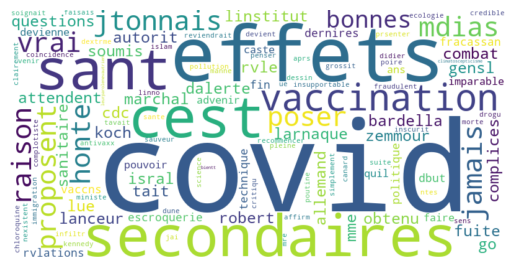

In [64]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


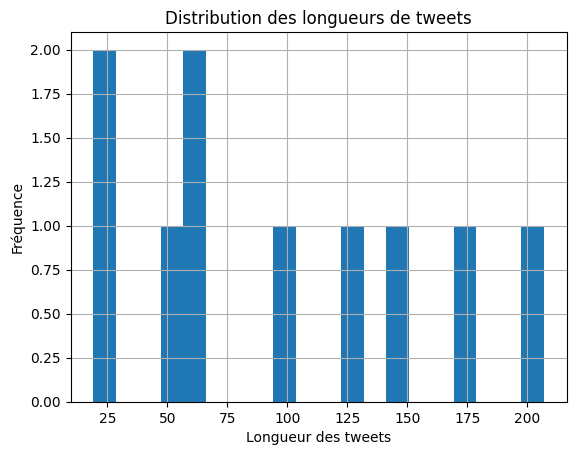

In [65]:
df['text_length'] = df['text'].apply(len)
df['text_length'].hist(bins=20)
plt.xlabel('Longueur des tweets')
plt.ylabel('Fréquence')
plt.title('Distribution des longueurs de tweets')
plt.show()


In [66]:
from textblob import TextBlob
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(df[['text', 'sentiment']].head())


                                                text  sentiment
0                          covid vrai jtonnais honte        0.0
1  raison mdias proposent jamais poser bonnes que...        0.0
2  lanceur dalerte obtenu go linstitut robert koc...        0.0
3  covid effets secondaires vaccns dernires rvlat...        0.0
4  cest technique imparable caste pouvoir ans fai...        0.0


In [38]:
# ---- Analyse des Tweets ----
# Nombre de tweets par jour
tweets_per_day = df.groupby('date').size()

# ---- Prétraitement des textes ----
# Tokenization des tweets
df['text_tokens'] = df['text'].str.split()
df['text_tokens']

0                       [covid, vrai, jtonnais, honte]
1    [raison, mdias, proposent, jamais, poser, bonn...
2    [lanceur, dalerte, obtenu, go, linstitut, robe...
3    [covid, effets, secondaires, vaccns, dernires,...
4    [cest, technique, imparable, caste, pouvoir, a...
5    [cest, fraudulent, science, linno, tavait, rev...
6                              [grossit, covid, manne]
7    [didier, ntes, credible, affirm, chloroquine, ...
8    [jai, simplement, critiqu, dessin, faisais, pe...
9    [sante, effets, secondaires, nexistent, aprs, ...
Name: text_tokens, dtype: object

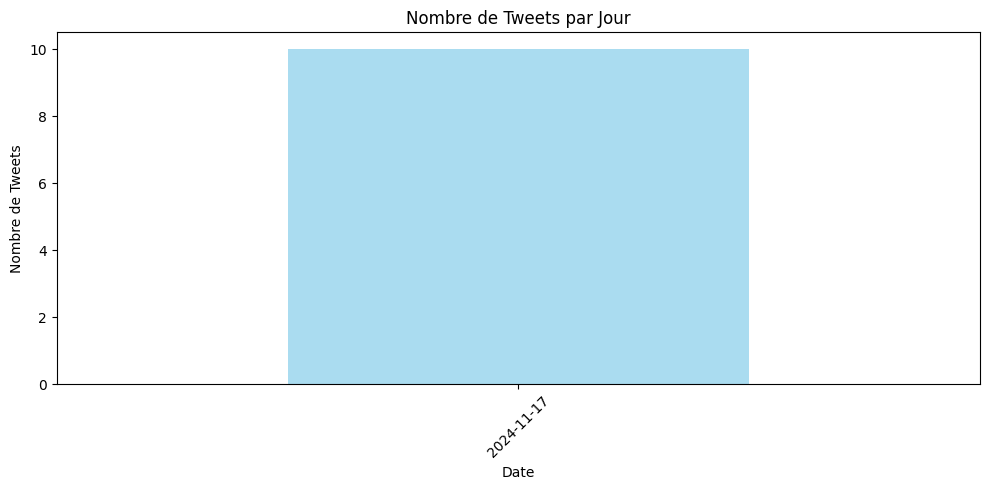

In [15]:
# Extraction des mots fréquents
all_words = [word for tokens in df['text_tokens'] for word in tokens]
word_freq = pd.Series(all_words).value_counts()

# ---- Visualisations ----
plt.figure(figsize=(10, 5))
tweets_per_day.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Nombre de Tweets par Jour')
plt.xlabel('Date')
plt.ylabel('Nombre de Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

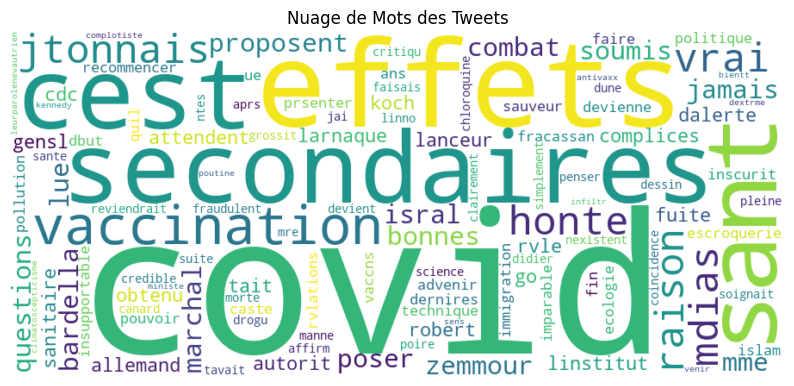

In [27]:
# ---- Nuage de mots ----
wordcloud = WordCloud(
    width=900,
    height=400,
    background_color='white',
    colormap='viridis',
).generate(' '.join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de Mots des Tweets')
plt.show()

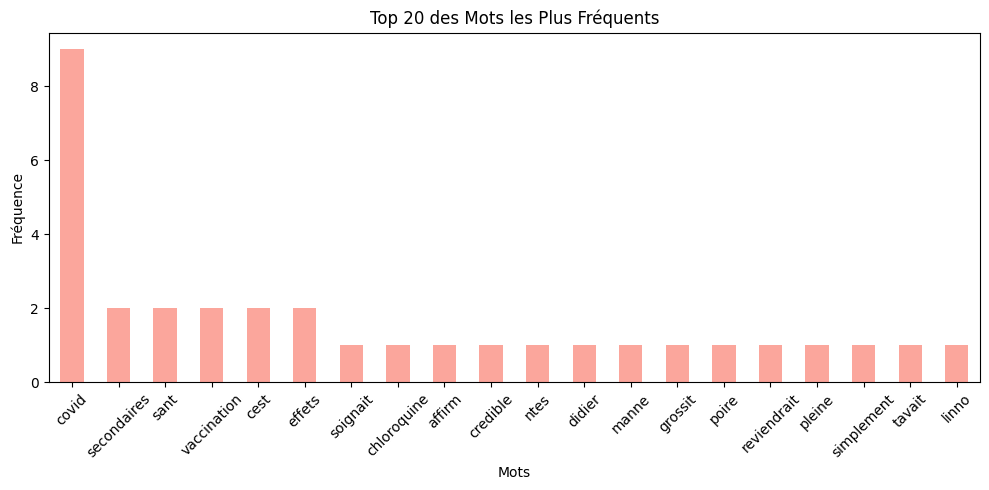

In [17]:
# ---- Histogramme des mots fréquents ----
plt.figure(figsize=(10, 5))
word_freq.head(20).plot(kind='bar', color='salmon', alpha=0.7)
plt.title('Top 20 des Mots les Plus Fréquents')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>Pretraitement tweets anglais</h2>

In [40]:
# Charger le fichier JSON
file_path = 'cleaned_en.json'  # Remplacez par le chemin vers votre fichier JSON
with open(os.path.join("../../data/cleaned",file_path), 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convertir en DataFrame
df_en = pd.DataFrame(data)
df_en

,tweet_id,text,created_at,author_id,context_annotations,language
0,1858193473310232643,bet refused wear mask covid brave flags,1731862822000,22534554,"[{'domain': {'id': '123', 'name': 'Ongoing New...",anglais
1,1858193469514117584,difference covid vaccination differences healt...,1731862821000,2590663369,"[{'domain': {'id': '123', 'name': 'Ongoing New...",anglais
2,1858193458923794624,weeks providential dad returned hospital covid...,1731862818000,1380668071921221636,"[{'domain': {'id': '123', 'name': 'Ongoing New...",anglais
3,1858193422462357519,believed california democrat middleoftheroad m...,1731862810000,42666106,"[{'domain': {'id': '10', 'name': 'Person', 'de...",anglais
4,1858193412777709863,study patients cancer treated cancer center co...,1731862807000,850455051965431808,"[{'domain': {'id': '123', 'name': 'Ongoing New...",anglais
5,1858193411875954981,cook stipe fight covid stipe chance,1731862807000,1825251921294241795,"[{'domain': {'id': '123', 'name': 'Ongoing New...",anglais
6,1858193410332459383,lol job rachel keeping americans safe healthy ...,1731862807000,1738328371531001857,"[{'domain': {'id': '123', 'name': 'Ongoing New...",anglais
7,1858193406377291828,covid lockdowns commie ny cuomo live everyday ...,1731862806000,1550947085226221570,"[{'domain': {'id': '46', 'name': 'Business Tax...",anglais
8,1858193405534142662,feed covid lab,1731862806000,1591770680743415808,"[{'domain': {'id': '123', 'name': 'Ongoing New...",anglais
9,1858193397346885672,imagine guilt family childrens doctorssurgeons...,1731862804000,1751925051476320257,"[{'domain': {'id': '123', 'name': 'Ongoing New...",anglais


In [43]:
# Expansion des colonnes imbriquées
df_en = pd.concat([df_en.drop(['context_annotations'], axis=1), df_en['context_annotations'].apply(pd.Series)], axis=1)
# df['context_annotations'] = df['context_annotations'].apply(lambda x: x if isinstance(x, list) else [])

# Convertir le timestamp en date lisible
df_en['created_at'] = pd.to_datetime(df_en['created_at'], unit='ms')

# Extraire uniquement les dates
df_en['date'] = df_en['created_at'].dt.date

In [44]:
# ---- Analyse des Tweets ----
# Nombre de tweets par jour
tweets_per_day = df_en.groupby('date').size()

# ---- Prétraitement des textes ----
# Tokenization des tweets
df_en['text_tokens'] = df_en['text'].str.split()
df_en['text_tokens']

0      [bet, refused, wear, mask, covid, brave, flags]
1    [difference, covid, vaccination, differences, ...
2    [weeks, providential, dad, returned, hospital,...
3    [believed, california, democrat, middleofthero...
4    [study, patients, cancer, treated, cancer, cen...
5           [cook, stipe, fight, covid, stipe, chance]
6    [lol, job, rachel, keeping, americans, safe, h...
7    [covid, lockdowns, commie, ny, cuomo, live, ev...
8                                   [feed, covid, lab]
9    [imagine, guilt, family, childrens, doctorssur...
Name: text_tokens, dtype: object

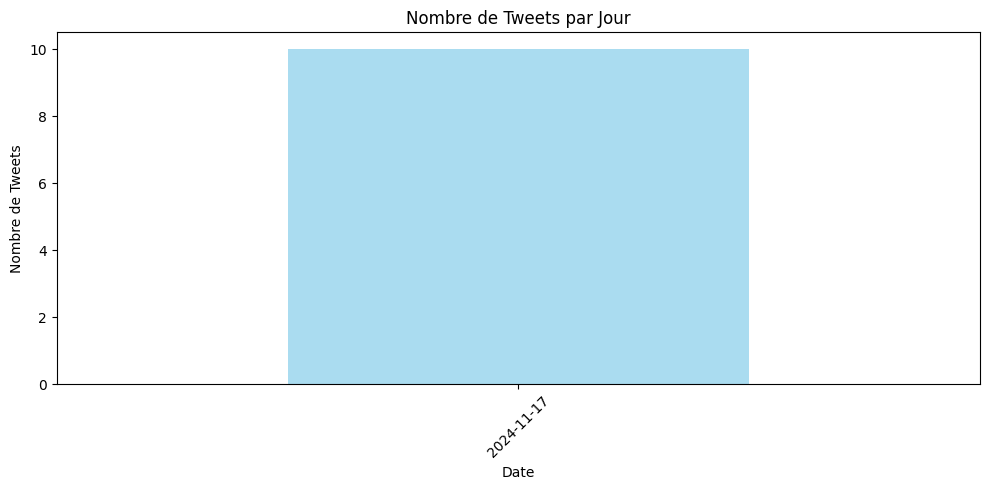

In [48]:
# Extraction des mots fréquents
all_words_en = [word for tokens in df_en['text_tokens'] for word in tokens]
word_freq_en = pd.Series(all_words_en).value_counts()

# ---- Visualisations ----
plt.figure(figsize=(10, 5))
tweets_per_day.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Nombre de Tweets par Jour')
plt.xlabel('Date')
plt.ylabel('Nombre de Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

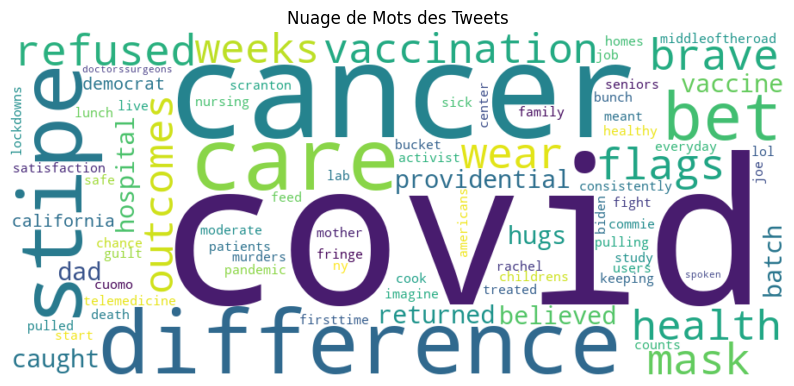

In [49]:
# ---- Nuage de mots ----
wordcloud = WordCloud(
    width=900,
    height=400,
    background_color='white',
    colormap='viridis',
).generate(' '.join(all_words_en))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de Mots des Tweets')
plt.show()

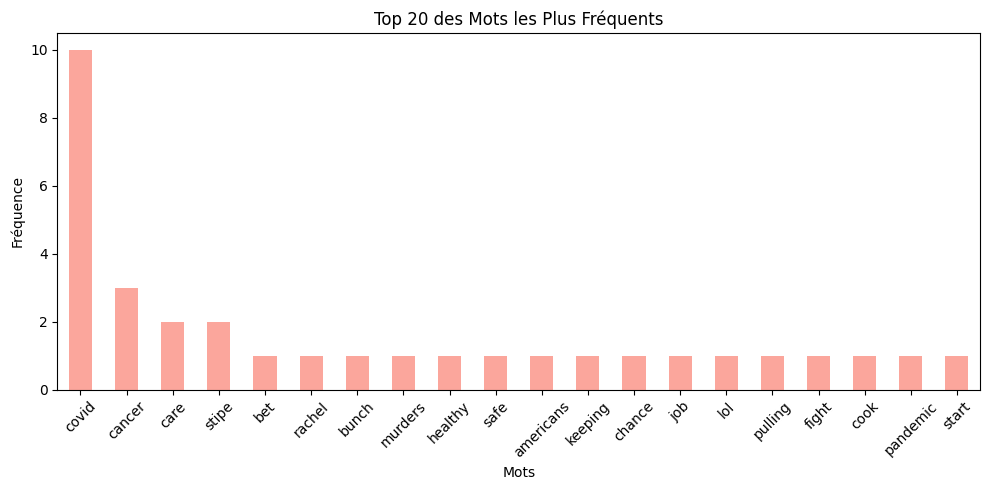

In [50]:
# ---- Histogramme des mots fréquents ----
plt.figure(figsize=(10, 5))
word_freq_en.head(20).plot(kind='bar', color='salmon', alpha=0.7)
plt.title('Top 20 des Mots les Plus Fréquents')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>Pretraitement Tweets Arabe</h2>

In [51]:
# Charger le fichier JSON
file_path = 'cleaned_ar.json'  # Remplacez par le chemin vers votre fichier JSON
with open(os.path.join("../../data/cleaned",file_path), 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convertir en DataFrame
df_ar = pd.DataFrame(data)
df_ar

,tweet_id,text,created_at,author_id,context_annotations,language
0,1858135995268436245,فدات شم,1731849118000,1331904918085627904,None,arabe
1,1858097362977046848,شاهدقصف عنيف يدمر بناية سكنية اساسها جنوب لبنا...,1731839907000,1750241238177976320,"[{'domain': {'id': '69', 'name': 'News Vertica...",arabe
2,1857992683945406879,covid حب بلوط,1731814950000,1186339095632584704,"[{'domain': {'id': '123', 'name': 'Ongoing New...",arabe
3,1857768485411066214,استشاري طبيبك تكون covid قذر الله,1731761497000,1780201089968570368,"[{'domain': {'id': '123', 'name': 'Ongoing New...",arabe
4,1857762421177286983,who exitthewho رسالةاليوم الوعيالجمعي اجندة لق...,1731760051000,3283099778,"[{'domain': {'id': '65', 'name': 'Interests an...",arabe
5,1857726338687180811,دراسة طبية كليفلاند كلينيك تحذر حالات التهاب ع...,1731751448000,1680924615252627456,None,arabe
6,1857726149675172271,الايدز الناجم اللقاح السجلات العسكرية تزيد بنس...,1731751403000,1680924615252627456,"[{'domain': {'id': '123', 'name': 'Ongoing New...",arabe
7,1857725946427527670,تشير بيانات حكومة كندا covid معظم المطعمين بال...,1731751355000,1680924615252627456,"[{'domain': {'id': '123', 'name': 'Ongoing New...",arabe
8,1857725820095111678,نتايج فحص الدكتوره zandre botha تخصص ميكروسكوب...,1731751325000,1680924615252627456,None,arabe
9,1857701949602189786,اعلن rfk سيرفع دعوى قضايية شركات الادوية الكبر...,1731745633000,563178346,"[{'domain': {'id': '46', 'name': 'Business Tax...",arabe


In [52]:
# Expansion des colonnes imbriquées
df_ar = pd.concat([df_ar.drop(['context_annotations'], axis=1), df_ar['context_annotations'].apply(pd.Series)], axis=1)
# df['context_annotations'] = df['context_annotations'].apply(lambda x: x if isinstance(x, list) else [])

# Convertir le timestamp en date lisible
df_ar['created_at'] = pd.to_datetime(df_ar['created_at'], unit='ms')

# Extraire uniquement les dates
df_ar['date'] = df_ar['created_at'].dt.date

In [53]:
# ---- Analyse des Tweets ----
# Nombre de tweets par jour
tweets_per_day = df_ar.groupby('date').size()

# ---- Prétraitement des textes ----
# Tokenization des tweets
df_ar['text_tokens'] = df_ar['text'].str.split()
df_ar['text_tokens']

0                                           [فدات, شم]
1    [شاهدقصف, عنيف, يدمر, بناية, سكنية, اساسها, جن...
2                                    [covid, حب, بلوط]
3             [استشاري, طبيبك, تكون, covid, قذر, الله]
4    [who, exitthewho, رسالةاليوم, الوعيالجمعي, اجن...
5    [دراسة, طبية, كليفلاند, كلينيك, تحذر, حالات, ا...
6    [الايدز, الناجم, اللقاح, السجلات, العسكرية, تز...
7    [تشير, بيانات, حكومة, كندا, covid, معظم, المطع...
8    [نتايج, فحص, الدكتوره, zandre, botha, تخصص, مي...
9    [اعلن, rfk, سيرفع, دعوى, قضايية, شركات, الادوي...
Name: text_tokens, dtype: object

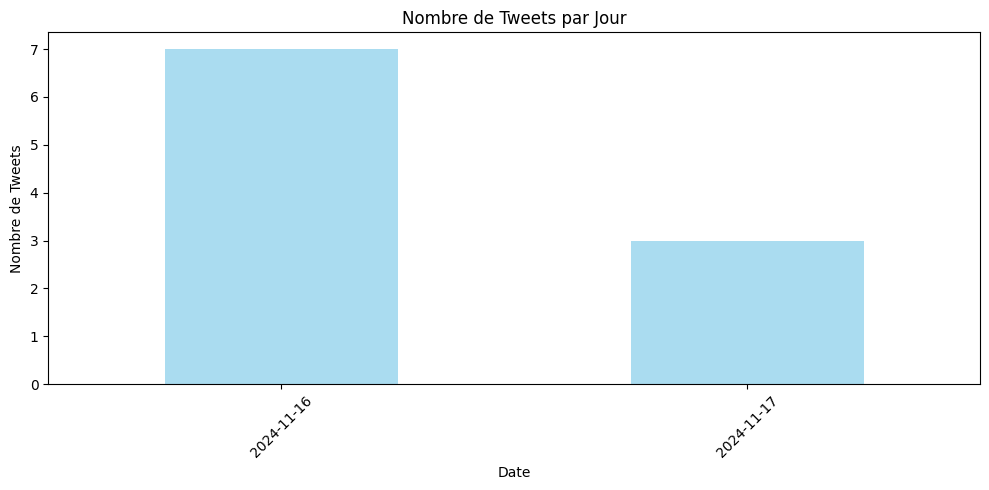

In [55]:
# Extraction des mots fréquents
all_words_ar = [word for tokens in df_ar['text_tokens'] for word in tokens]
word_freq_ar = pd.Series(all_words_ar).value_counts()

# ---- Visualisations ----
plt.figure(figsize=(10, 5))
tweets_per_day.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Nombre de Tweets par Jour')
plt.xlabel('Date')
plt.ylabel('Nombre de Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

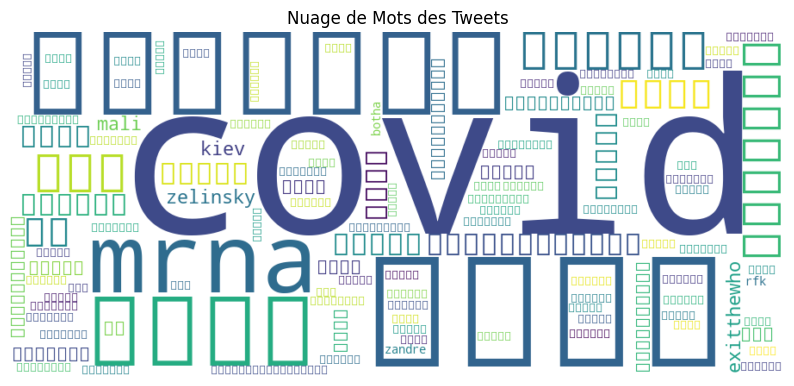

In [56]:
# ---- Nuage de mots ----
wordcloud = WordCloud(
    width=900,
    height=400,
    background_color='white',
    colormap='viridis',
).generate(' '.join(all_words_ar))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de Mots des Tweets')
plt.show()

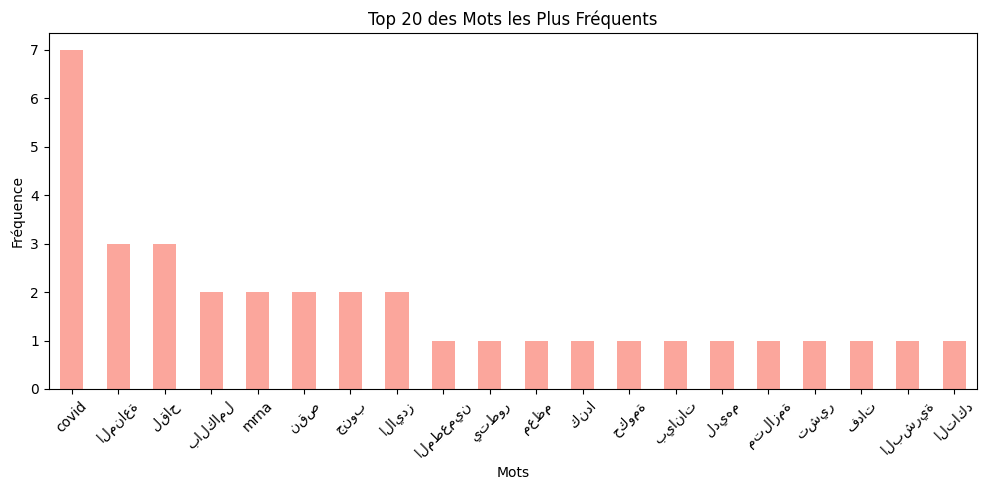

In [57]:
# ---- Histogramme des mots fréquents ----
plt.figure(figsize=(10, 5))
word_freq_ar.head(20).plot(kind='bar', color='salmon', alpha=0.7)
plt.title('Top 20 des Mots les Plus Fréquents')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()